# Global Power Plant Project:
**Submitted by** Chandrashekar k v Batch No:1836.

## **Statement**:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction

1) Primary Fuel
2) capacity_mw

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset

In [83]:
# Reading the csv file from dataset
df = pd.read_csv("Global_Power_Plant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset contains 907 rows and 27 columns.

## Data description:

* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* `country_long` (text): longer form of the country designation
* `name` (text): name or title of the power plant, generally in Romanized form
* `gppd_idnr` (text): 10 or 12 character identifier for the power plant
* `capacity_mw` (number): electrical generating capacity in megawatts
* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `primary_fuel` (text): energy source used in primary electricity generation or export
* `other_fuel1` (text): energy source used in electricity generation or export
* `other_fuel2` (text): energy source used in electricity generation or export
* `other_fuel3` (text): energy source used in electricity generation or export
*  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
* `owner` (text): majority shareholder of the power plant, generally in Romanized form
* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* `url` (text): web document corresponding to the `source` field
* `geolocation_source` (text): attribution for geolocation information
* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* `year_of_capacity_data` (number): year the capacity information was reported
* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
* `generation_data_source` (text): attribution for the reported generation information
* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
* `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
* `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
* 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
* `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
* `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
* `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
* `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


In [84]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [85]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

In [86]:
# Checking the dimension of dataset 
df.shape

(907, 27)

The dataset contains 907 rows and 27 coolumns.

In [87]:
# Checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Dataset contains object and float type of data.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

* There are some null values present in some solumns.
* other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019 and estimated_generation_gwh has all Nan values so i can drop these columns.
* other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training.

In [89]:
#Droping unnecessary columns
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df=df.drop(["generation_gwh_2013"],axis=1)
df=df.drop(["generation_gwh_2019"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)

In [90]:
#Checking unique values of each column
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

* These are the number of unique values present in each columns.
* country, country_long, year_of_capacity_data and generation_data_source has only one unique count which means all the values of the column are filled with NaN values so no need to keep all these columns unnecessarily.
so i can drop these columns also

In [91]:
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [92]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [93]:
#lets check the name column entries
df['name'].value_counts()

TUTICORIN             1
SALORA                1
VIJAIPUR WORKS        1
KAWAI TPP             1
SRISAILAM LBPH        1
                     ..
THAMMINAPATNAM TPP    1
PURULIA PSS           1
PALATANA CCPP         1
P.NALLUR CCGT         1
BELLARY DG            1
Name: name, Length: 907, dtype: int64

Name column has unique names for each power plant so we can drop this column.

In [94]:
#lets check the gppd_idnr column entries
df['gppd_idnr'].value_counts()

WRI1019889    1
IND0000168    1
IND0000173    1
IND0000213    1
WRI1026216    1
             ..
WRI1026194    1
IND0000372    1
WRI1026138    1
IND0000187    1
IND0000389    1
Name: gppd_idnr, Length: 907, dtype: int64

gppd_idnr also has all the values unique so let me drop it since it can not contribute to model training.

In [95]:
#lets check entries in source column
df["owner"].value_counts()

Acc Acc ltd                                 4
Jk Cement ltd                               4
Sterling Agro Industries ltd.               4
SWPPL                                       3
Shree Sugars ltd                            3
                                           ..
Northwest Energy Private Limited (NWEPL)    1
Solitaire Energies Pvt Ltd                  1
LNJ Power Ventures Limited                  1
Manikgarh Manikgarh cement                  1
Reliance Power                              1
Name: owner, Length: 280, dtype: int64

Owner also looks like an unnecessary column since keeping all owner names will never distrub or give inputs to my prediction so i think i have to drop this column.
And url column also has no input for prediction ao i can this column as well.

In [96]:
#lets check entries in source column
df["source"].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Welspun Solar AP Private Limited               1
Uttam Steels ltd                               1
LEPL                                           1
ACME Cleantech Solutions Private Limited       1
National And paper                             1
Name: source, Length: 191, dtype: int64

In [97]:
#Droping unnecessary columns
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [98]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [99]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

There are null values in all columns except capacity_mw, primary_fuel and source.

<AxesSubplot:>

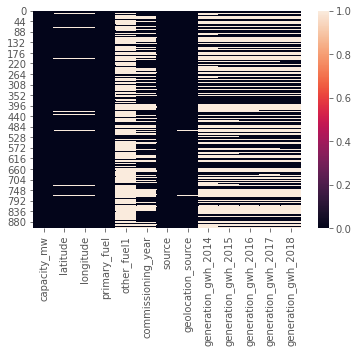

In [100]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [101]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

Except latitude all other columns are skewed.So in all other numerical columns i have to replace the NaN values with median.In latitude column i can replace NaN by mean.

## Feature engineering:

In [102]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

I have extracted Power_plant_age column from commissioning_year column and droped commissioning_year.I think Power_plant_age may contribute more than commissioning_year for our prediction.

## Treating null values using imputation techniques.

In [103]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [104]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [105]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

Now no null values present in the dataset.

In [106]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [107]:
#Checking unique values of target column
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

These are the unique values present in the target column.

In [108]:
#Checking unique values of target column
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [109]:
#Checking for empty observations
df.loc[df['primary_fuel'] == " "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


There is no empty observations in primary_fuel column.

In [110]:
#Checking for empty observations
df.loc[df['capacity_mw'] == " "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


There is no empty observations in capacity_mw column also.

In [111]:
#Checking description of data set
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


* All the null values has been removed, so the count in all columns is same.
* The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
* In some columns the difference is more between max and 75% so there are outliers present in most of the columns.

In [112]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


These are the categorical columns in the given datatset.

In [113]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


These are the numerical columns in the dataset.

# Data Visualization

# Univariate Analysis

## Plotting categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


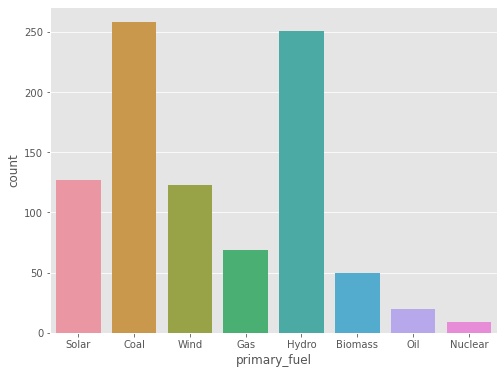

In [114]:
# Visualizing the types of fuel in primary_fuel
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["primary_fuel"])
plt.show()

from the above plot we can see that most of the plants in INDIA uses Coal and Hydro as there fuel.And very less plants uses Nuclear fuel.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


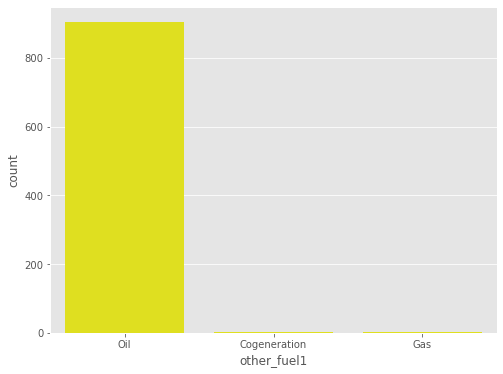

In [115]:
# Visualizing the counts of other fuel
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["other_fuel1"], color='yellow')
plt.show()

It seems most of the plants are using Oil as the other_fuel.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


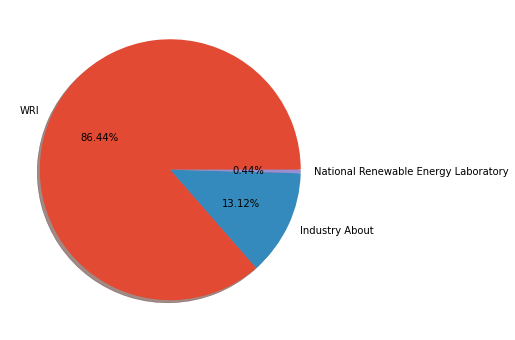

In [116]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

It shows that maximum power plants source is WRI.And very less plants has National Renewable Energy Laboratory as source.

## Plotting numerical columns

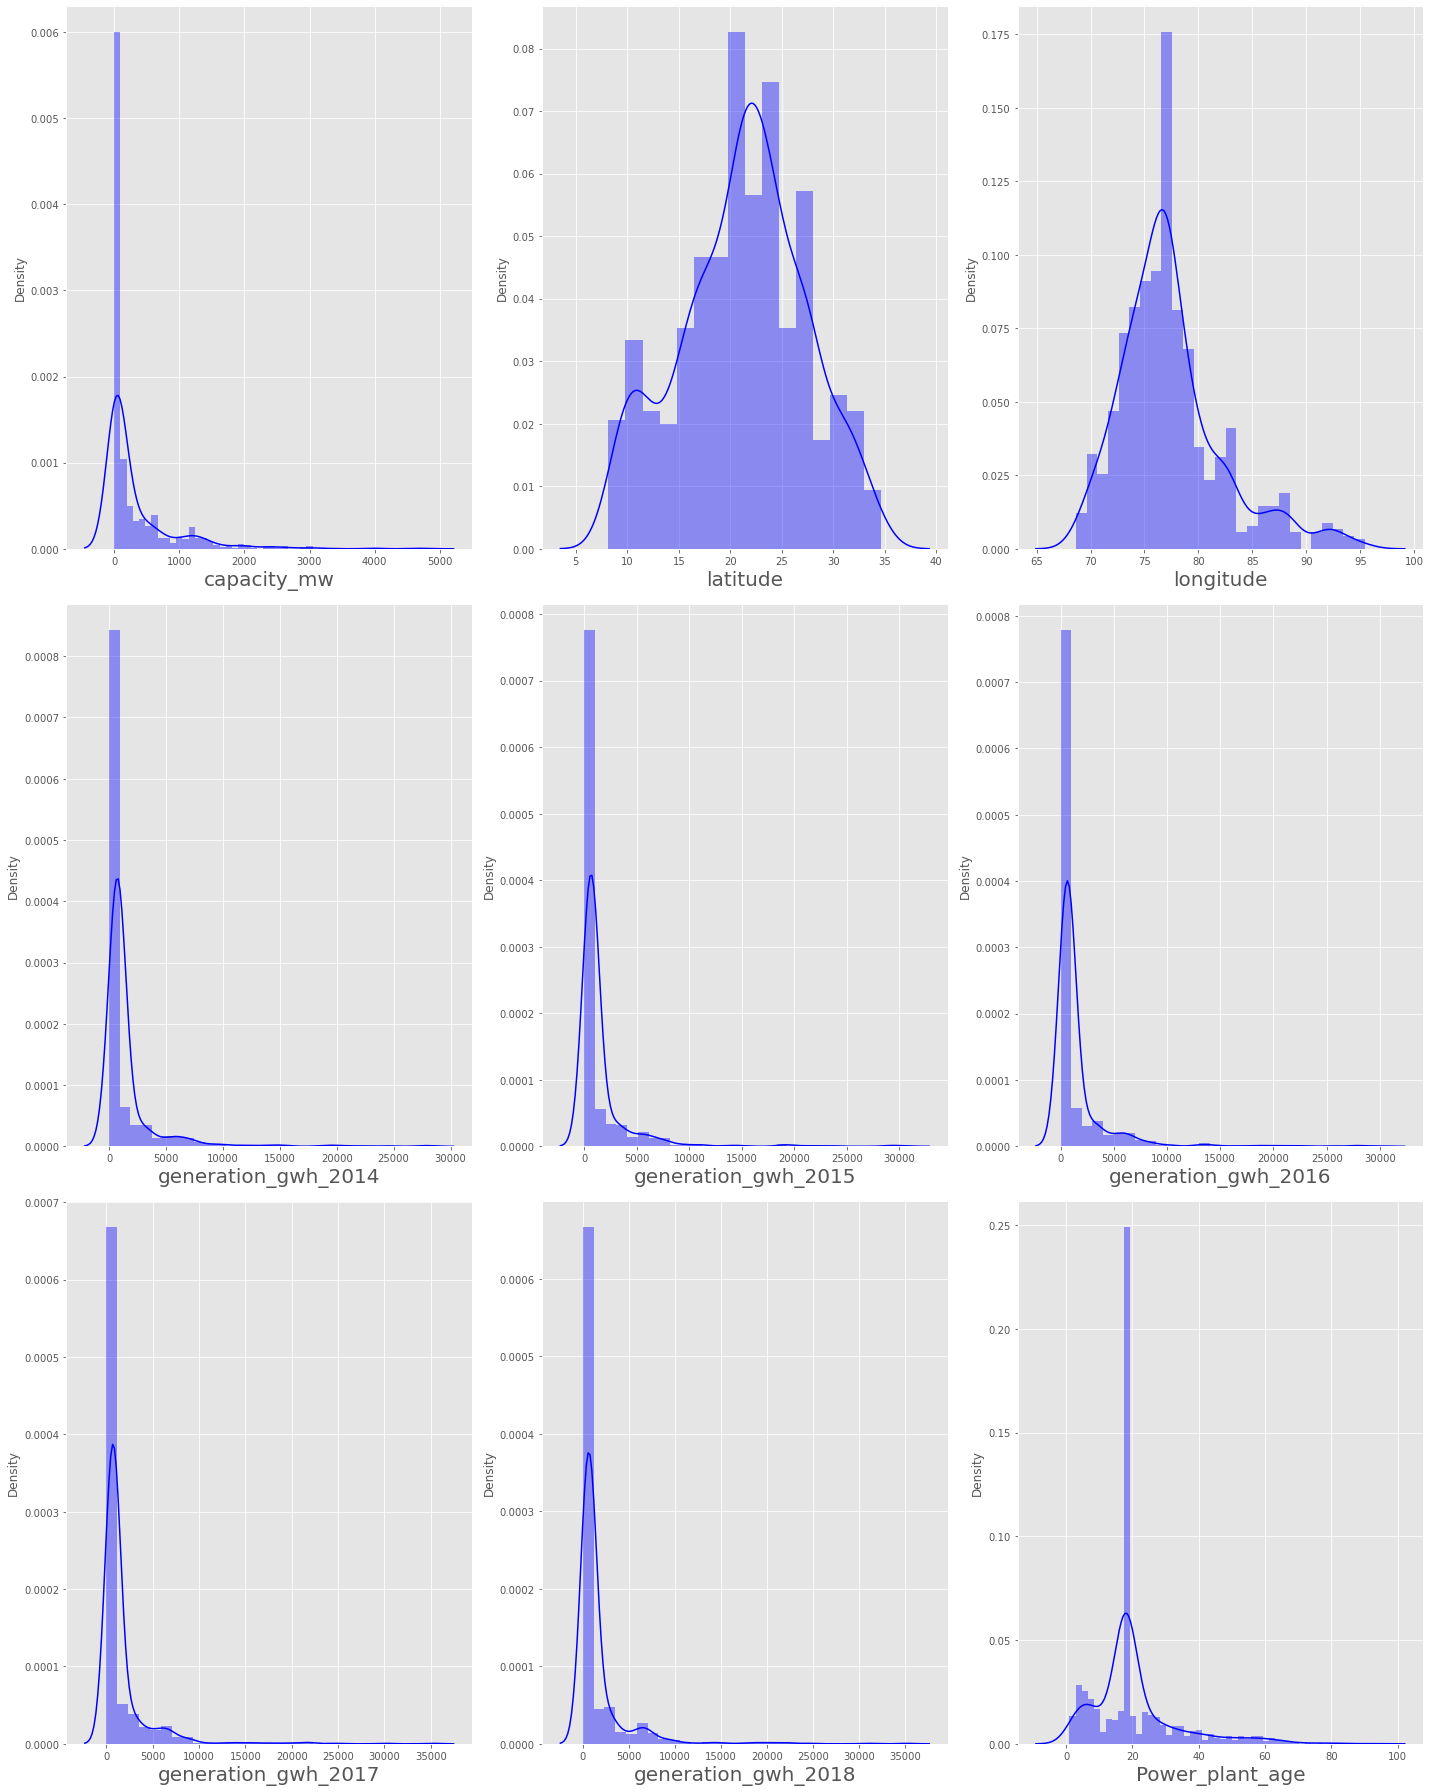

In [117]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


From the above distribution plots we can observe that the data is not normally distributed in all the columns except latitude.

## Bivariate Analysis

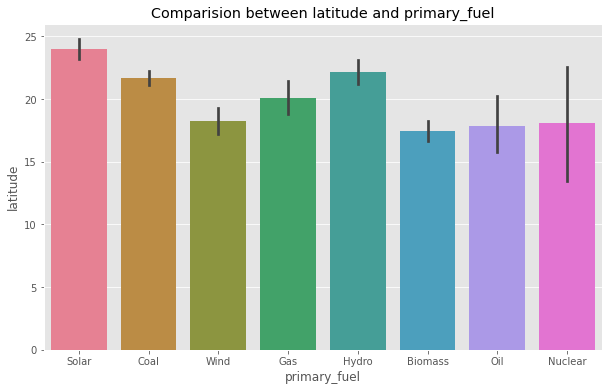

In [118]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["latitude"],palette="husl");

The fuel type Solar has high latitude followed by Hydro, Coal and Gas and remaining sources.

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

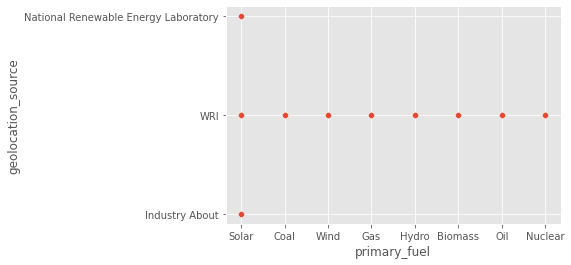

In [119]:
sns.scatterplot(x='primary_fuel',y='geolocation_source',data=df,palette="husl")

 geolocation_source= WRI has all the types of fuels used but Industry About and National Renewable Energy Laboratory has only solar as fuel.

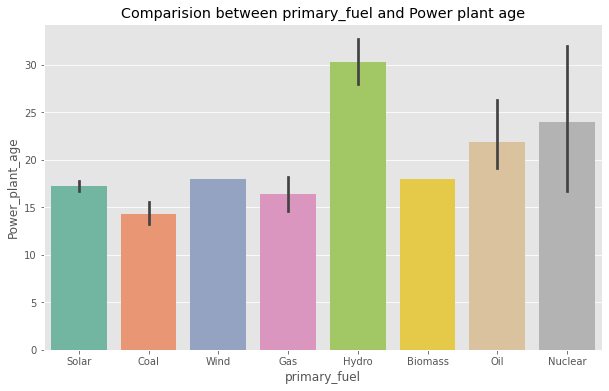

In [120]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

* Hydro,Nuclear and Oil fuels are old power plants.
* and solar and coal fuels are recently added ones.

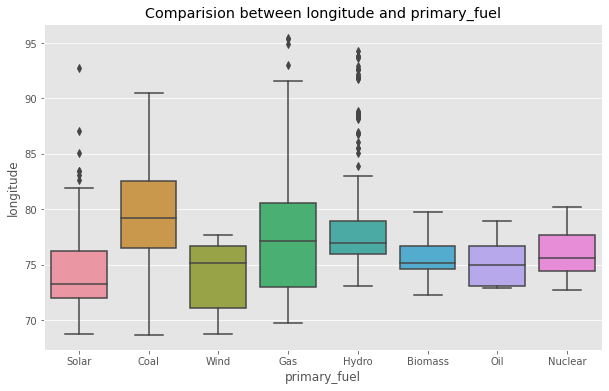

In [121]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
sns.boxplot(df['primary_fuel'],df["longitude"]);

The primary_fuel has high longitude followed by Hydro, Solar and Coal. Other fuel types have very less longitude.

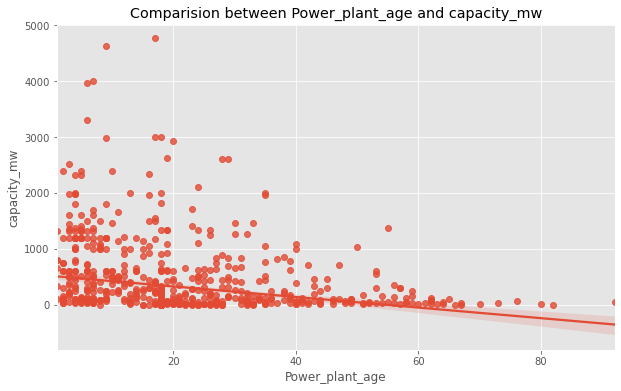

In [122]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw']);

From the plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

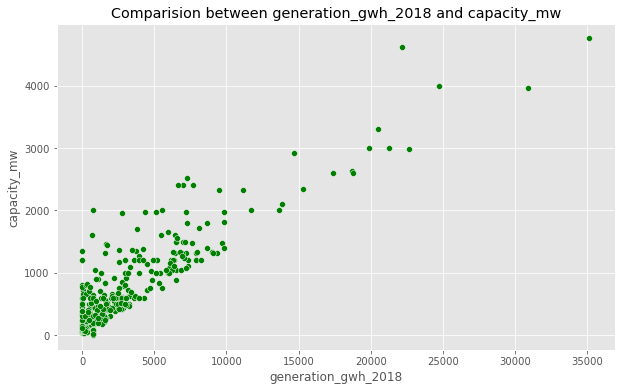

In [123]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2018 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw", data = df,color="g")
plt.show()

We can notice the linear relationship between the feature and the label. Here the electricity generation reported for the year 2018 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

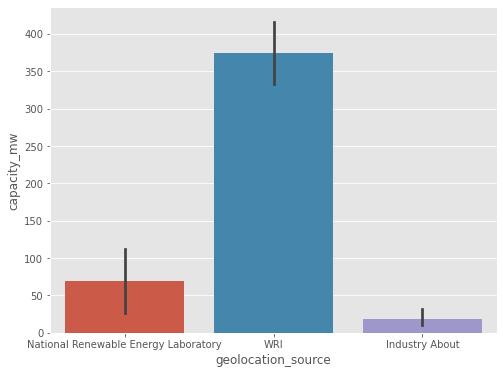

In [124]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (8,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more tahn 350 mega watts. The geolacation source Industry About has less capacity.

### Checking the relation between targets

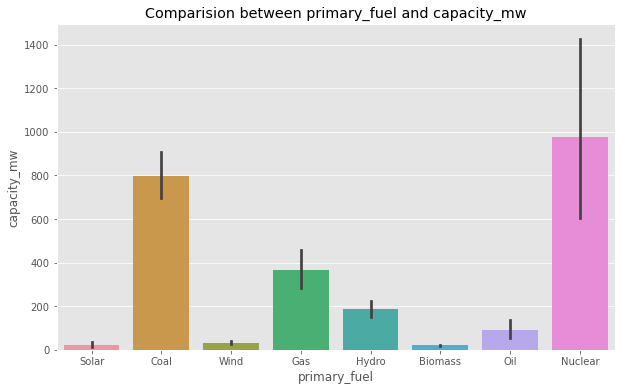

In [125]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

The plant which uses Nuclear and Coal as fuel has more capacity than other plants uses other fuels.

# Multivariate Analysis:

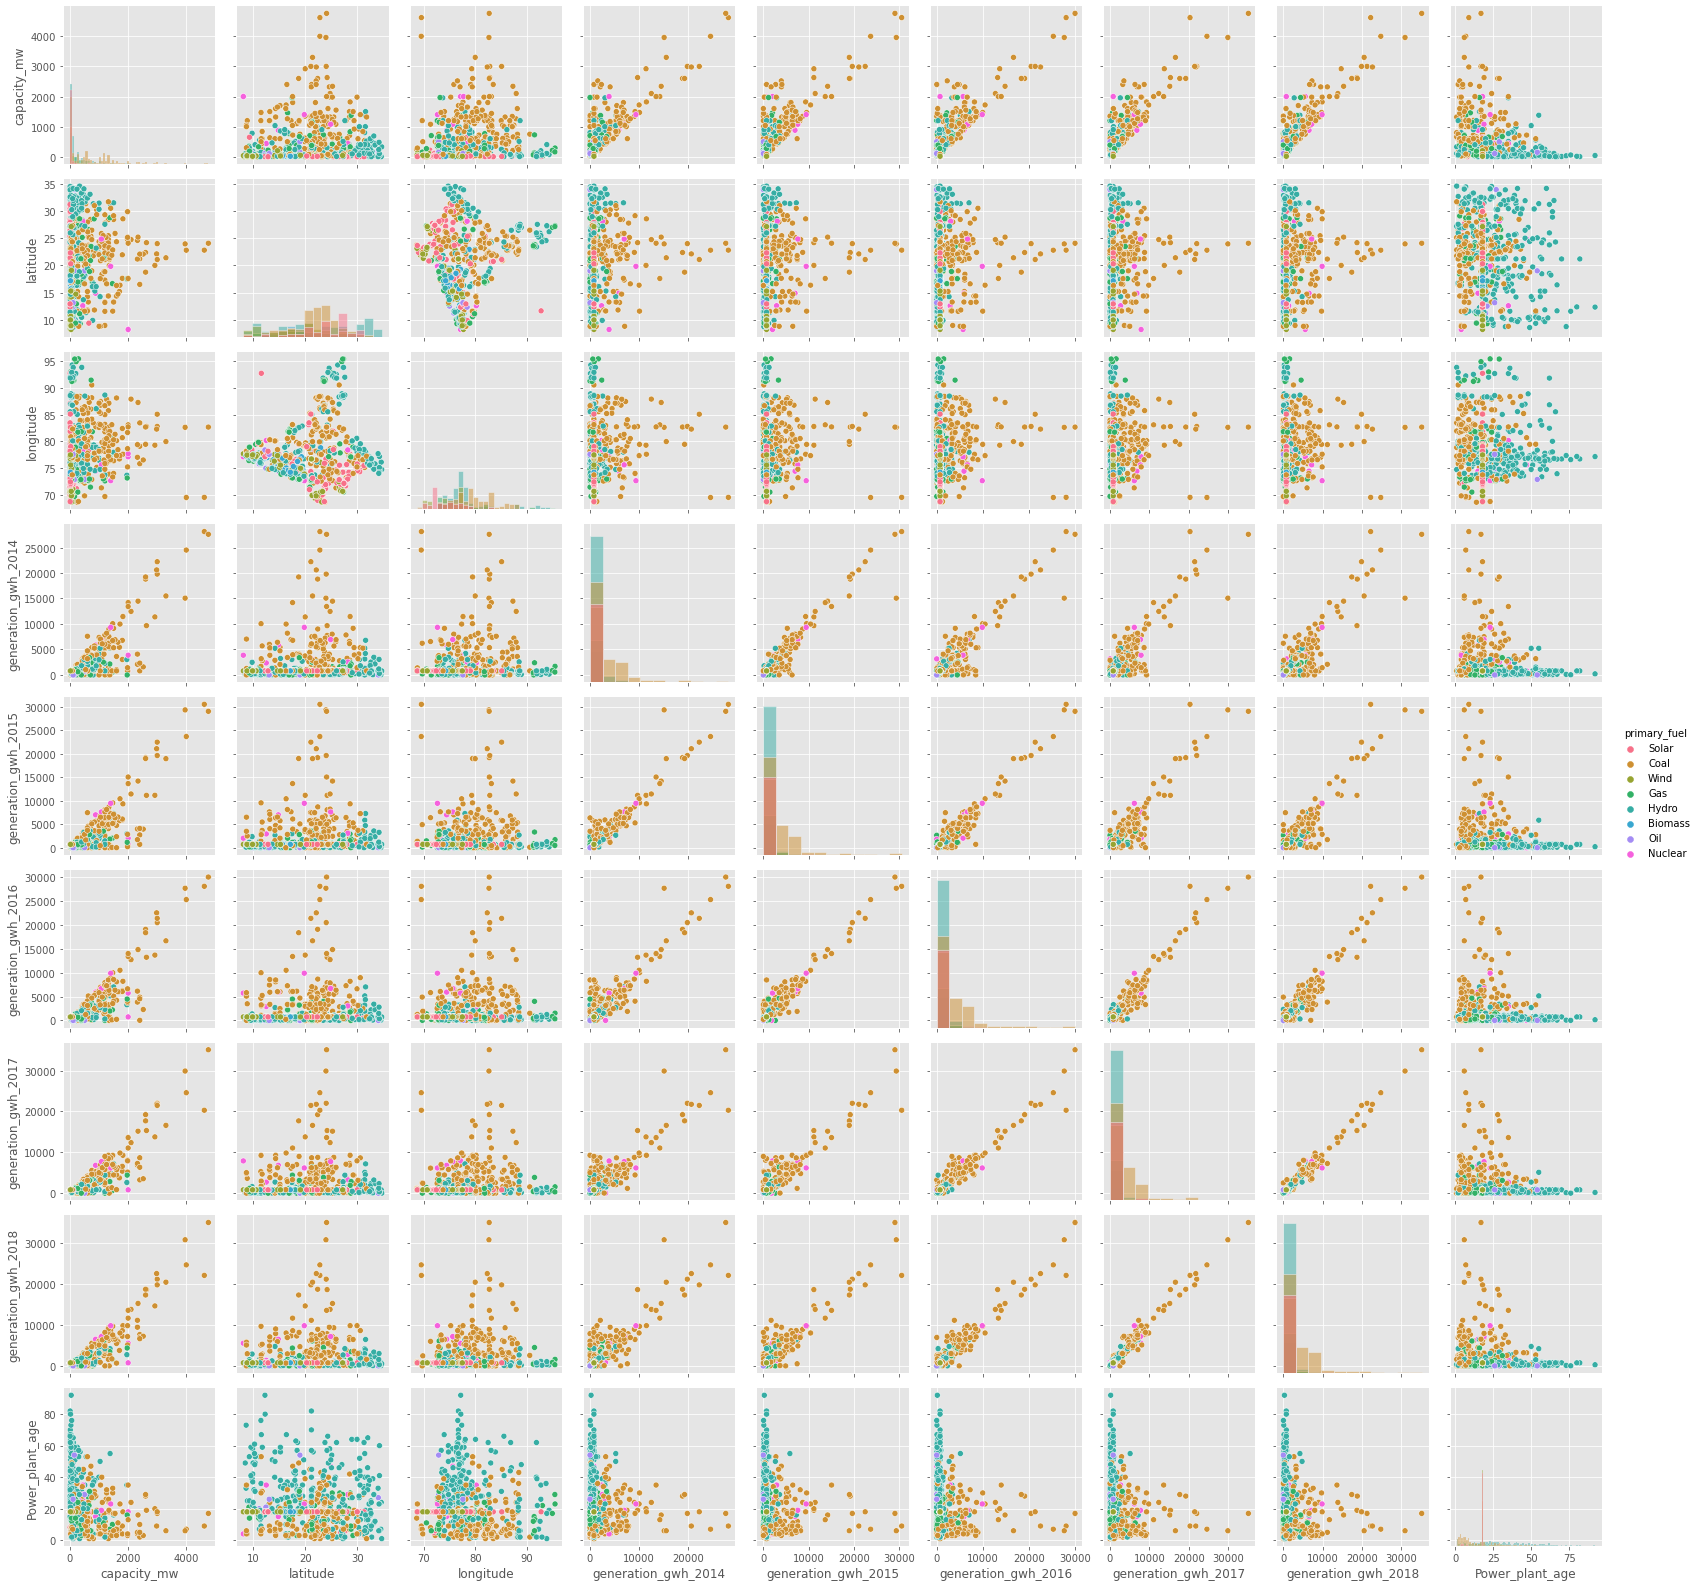

In [144]:
# Checking the pairwise relation between the features and label capacity in megawatt.
g = sns.PairGrid(df, hue="primary_fuel")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

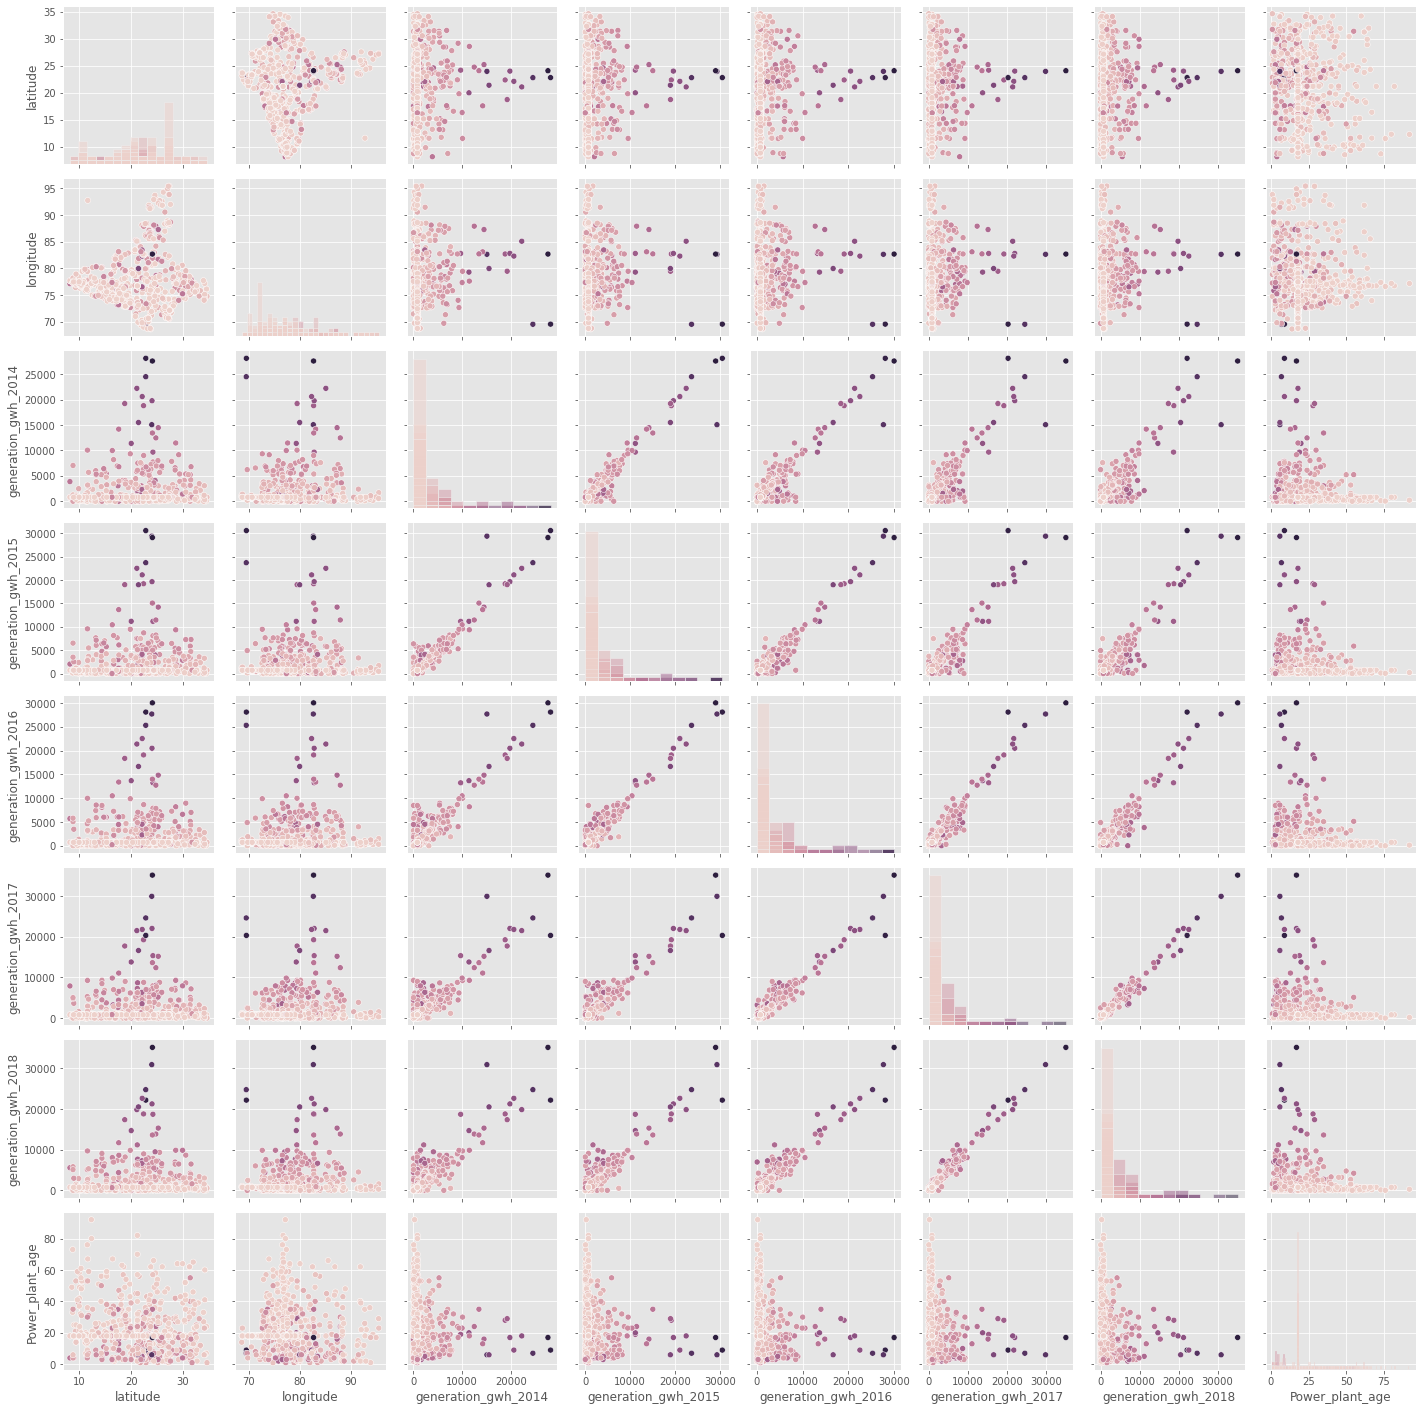

In [145]:
g = sns.PairGrid(df,hue="capacity_mw")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Identifying the outliers

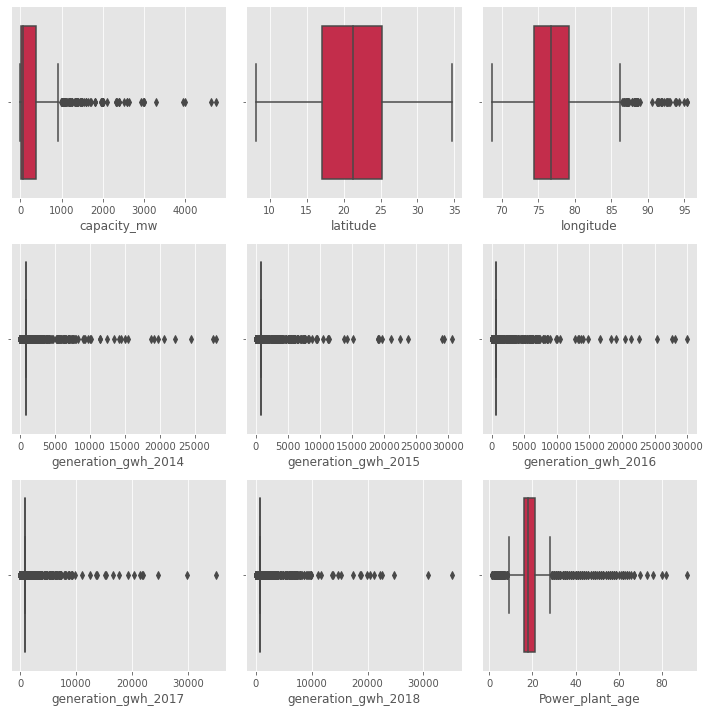

In [147]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Since capacity_mw is my target no need to remove outliers in that column.

# Removing outliers

## i) Zscore method

In [148]:
# Features containing outliers
features = df[['longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [149]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871]])

In [150]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [151]:
# Shape of original dataset
df.shape

(907, 13)

Before removing the outliers we had 907 rows and 13 columns.

In [152]:
new_df.shape

(851, 13)

After removing the outliers we have 851 rows and 13 columns.

In [153]:
# Checking the the data loss
data_loss = (907-851)/907*100
data_loss

6.174200661521499

Using Zscore i have 6.17% data loss.Which is less than 10%.But still let me have a look into IQR method also.

## ii) IQR (Inter Quantile Range) method

In [154]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [155]:
df1.shape

(420, 13)

Using IQR method the dataframe has 420 rows and 13 columns.

In [156]:
# Let's check the dataloss
data_loss = (907-420)/907*100
data_loss

53.69349503858876

Using IQR method we are losing 54% of data, so considering Zscore method for better result.

# Encoding the categorical columns using Label Encoding

In [157]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [158]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [159]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Correlation between the target variable and features using HEAT map

In [160]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

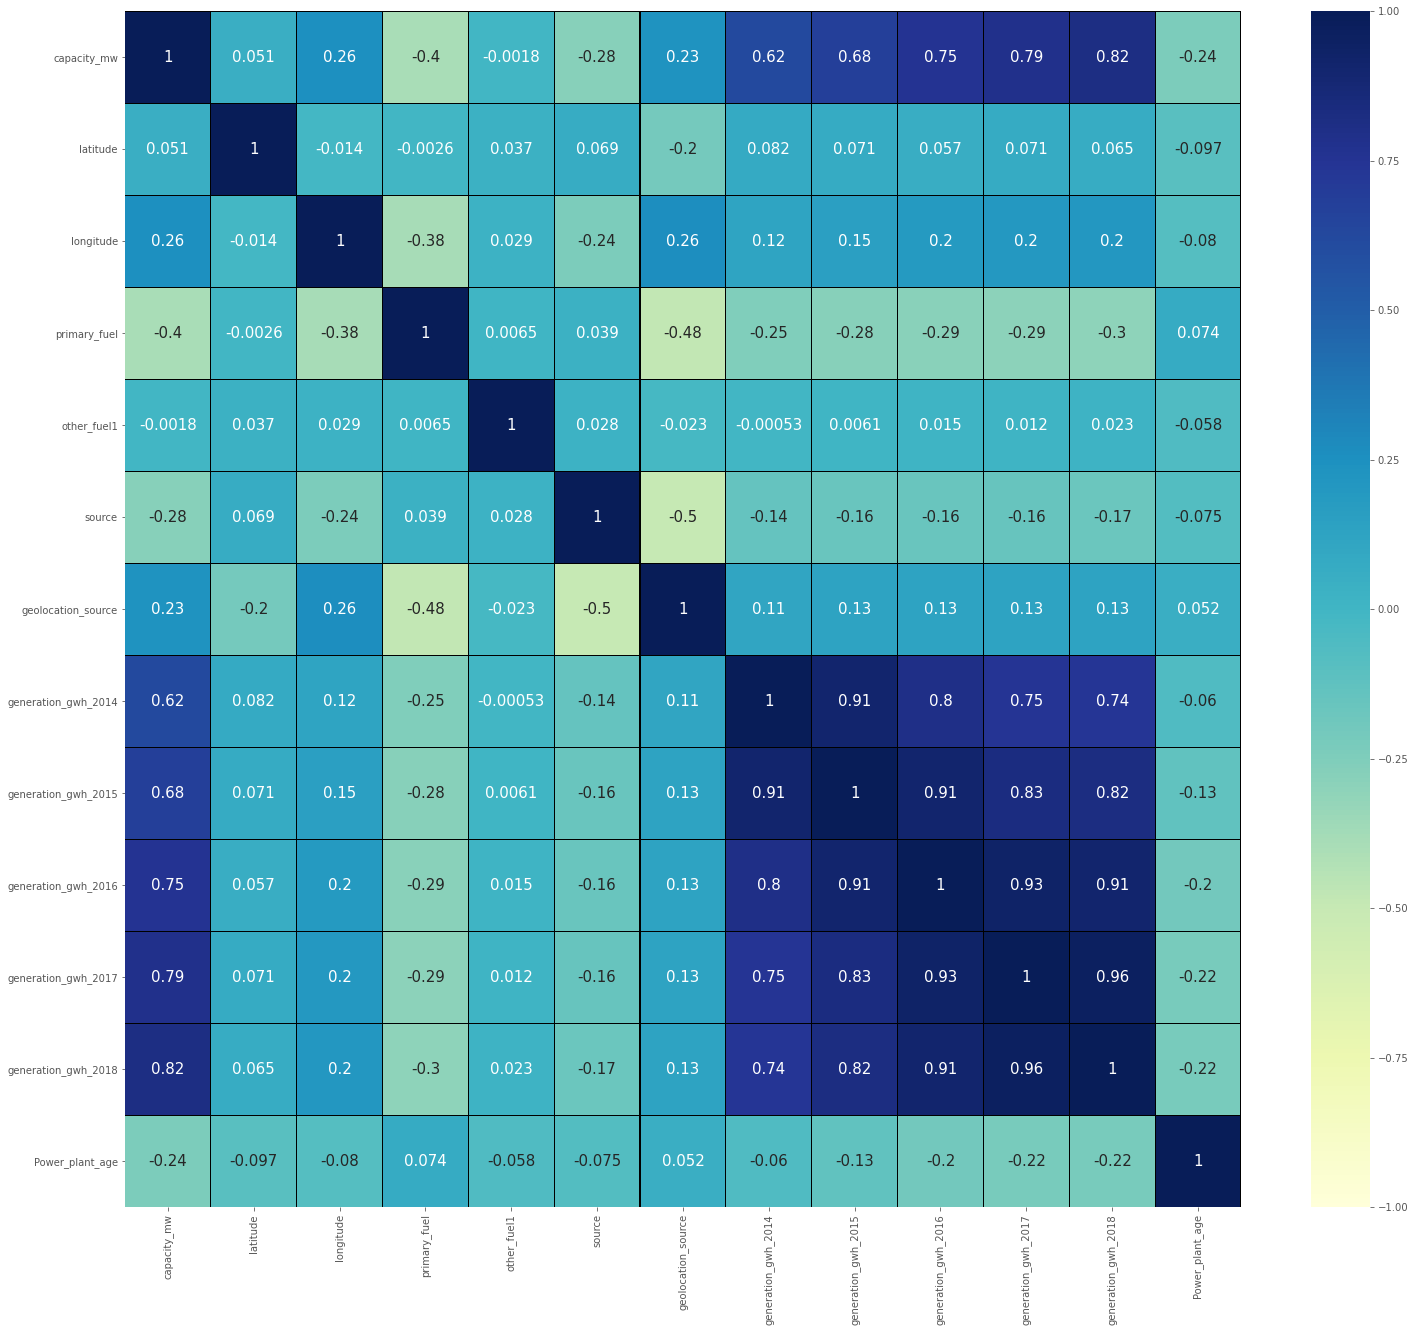

In [161]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

**Correlation between primary_fuel and features** :
* The label Fuel_Type is less correlated with Power_plant_age and source.
* The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

**Correlation between capacity_mw and features**:
* The label capacity_mw is highly positively correlated with the features generation_gwh_2018, features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014.
* And the label is negatively correlated with the feature primary_fuel, source and Power_plant_age.
* The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

# Visualizing the correlation between label(primary_fuel) and features using bar plot

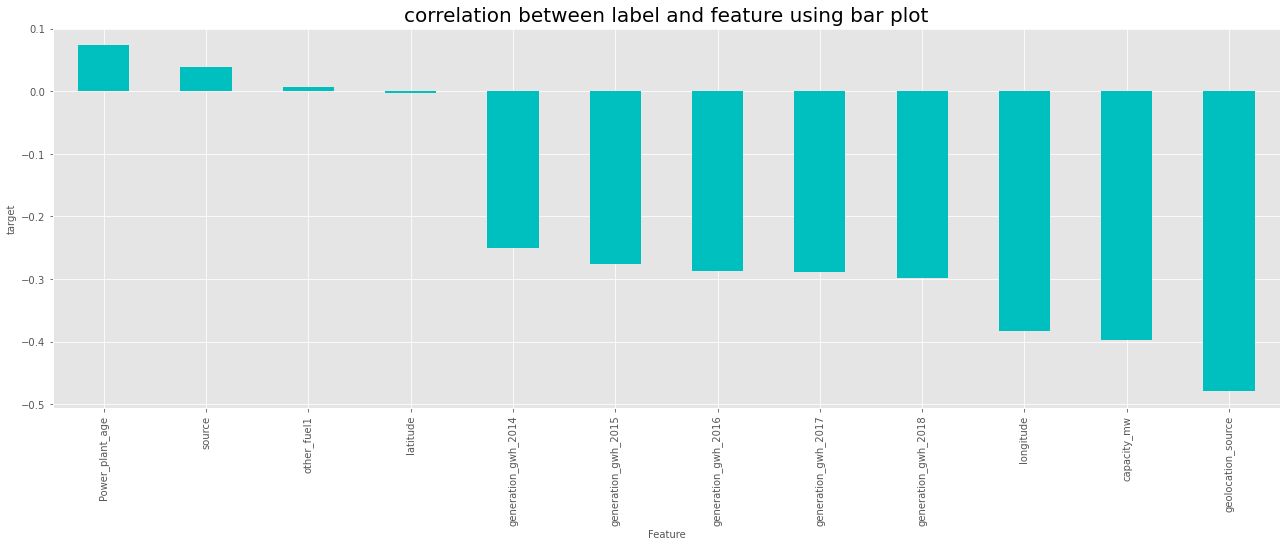

In [162]:
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

other_fuel1 and latitude is very less correlated with primary_fuel so i can drop it.

# Visualizing the correlation between label(capacity_mw) and features using bar plot

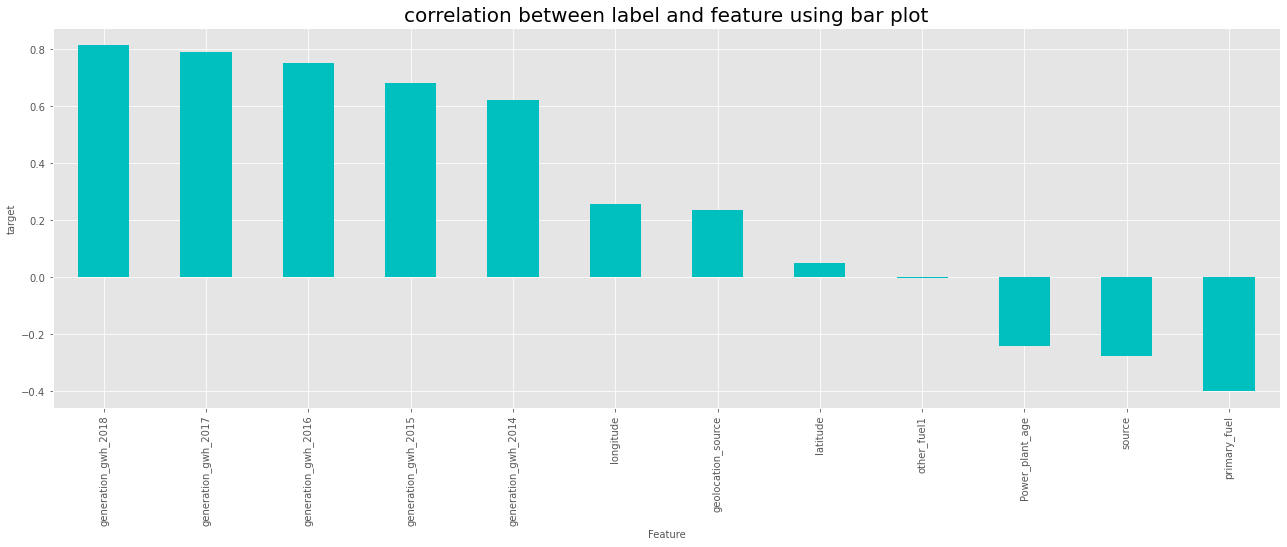

In [163]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

Lattitude and otherfuel_1 have less correlation with target variable, i can drop these columns.

In [165]:
#Droping less correlated column
new_df =new_df.drop(["other_fuel1"],axis=1)
new_df =new_df.drop(["latitude"],axis=1)

In [166]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# 1. Prediction for primary_fuel

### Separating the features and label variables into x and y

In [167]:
x = new_df.drop("primary_fuel", axis=1)
y = new_df["primary_fuel"]

In [168]:
x.shape

(851, 10)

In [169]:
y.shape

(851,)

## Checking for skewness

In [170]:
x.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns. Let's remove the skewness in the numerical columns using yeo-johnson method.

## Removing skewness using yeo_johnson method

In [171]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

In [172]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [173]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [175]:
# Checking skewness after using yeo-johnson ethod
x.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

Now we have removed the skewness in all the numerical columns.

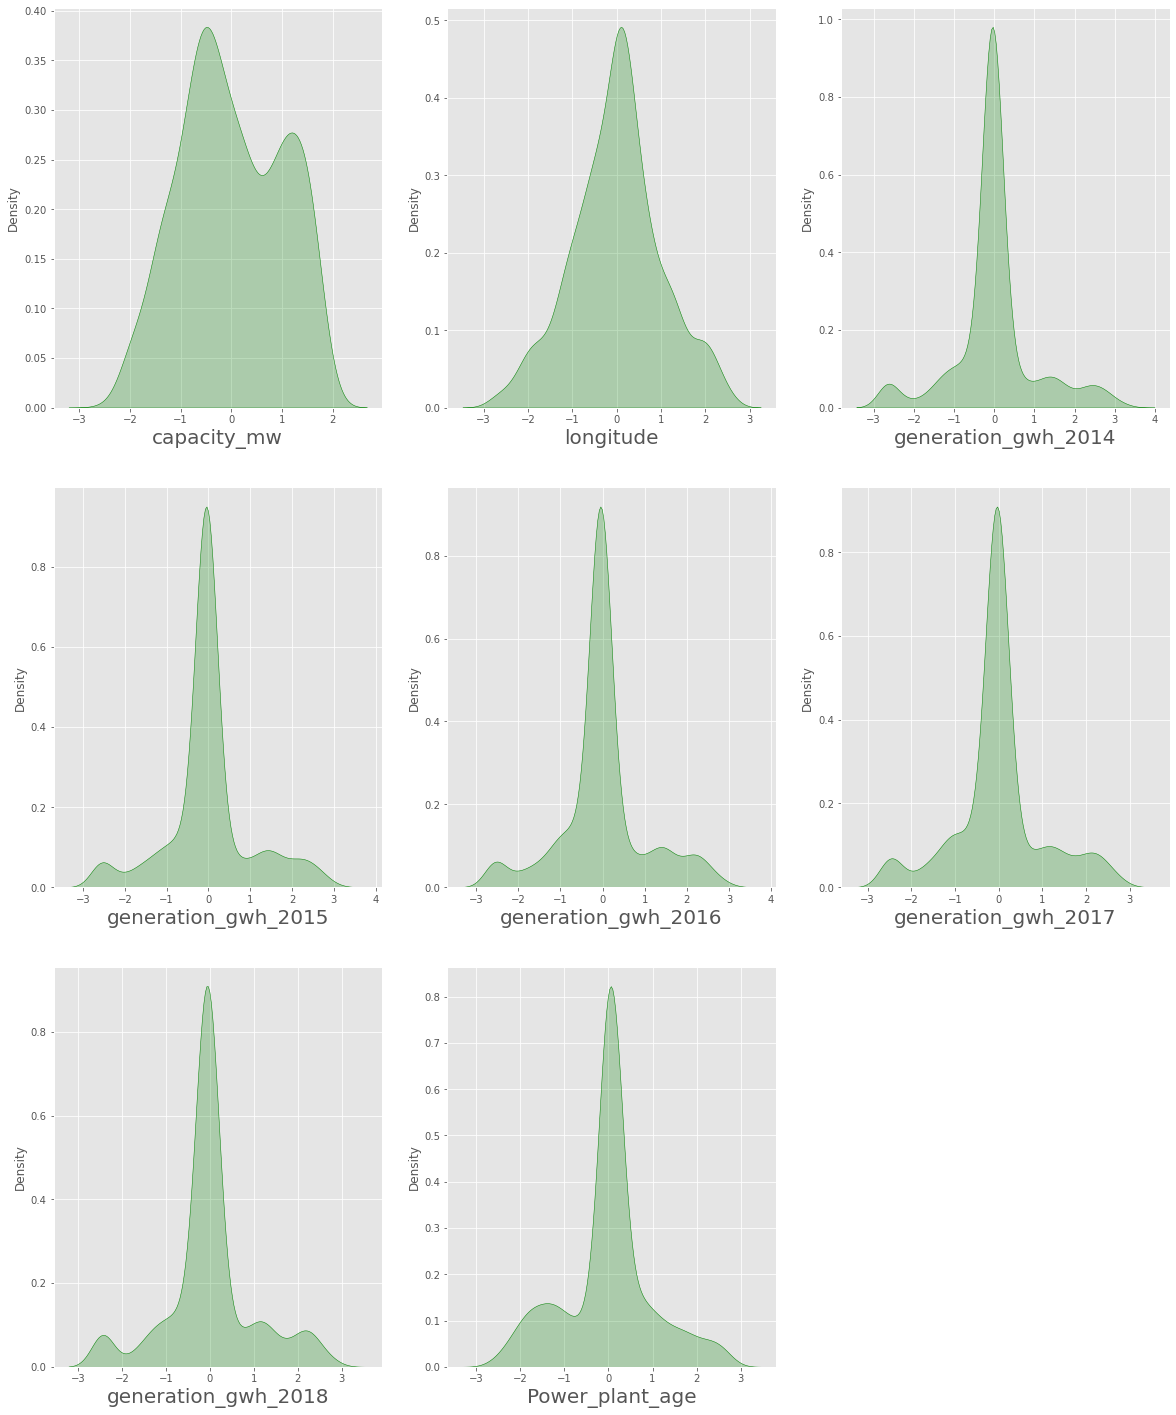

In [176]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Scaling the data using standard scaler:

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


# Checking VIF values

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.812831,capacity_mw
1,1.193721,longitude
2,1.413003,source
3,1.590920,geolocation_source
4,3.623098,generation_gwh_2014
5,6.190488,generation_gwh_2015
6,9.960383,generation_gwh_2016
7,9.766254,generation_gwh_2017
8,8.960982,generation_gwh_2018
9,1.155462,Power_plant_age


The VIF value is less than 10 in all the columns which means we don't have  multicollinearity problem.

In [179]:
y.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced, so we have to balance the data by over sampling.

In [180]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [181]:
y.value_counts()

0    238
1    238
2    238
3    238
4    238
5    238
6    238
7    238
Name: primary_fuel, dtype: int64

Now the data has been balanced.

In [182]:
# DataFrame after preprocessing and data cleaning
x.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


# Finding Best Random State and Accuracy:

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8986013986013986  on Random_state  85


### Creating train_test split

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created a new train test split using Random State.

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [187]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8881118881118881
[[70  4  0  0  0  2  0  0]
 [ 3 34  4  6  4  4  0  0]
 [ 1  2 69  2  1  5  0  0]
 [ 0  6  4 53  3  0  0  0]
 [ 0  3  3  0 75  0  0  0]
 [ 0  3  3  1  0 64  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        76
           1       0.65      0.62      0.64        55
           2       0.83      0.86      0.85        80
           3       0.85      0.80      0.83        66
           4       0.90      0.93      0.91        81
           5       0.85      0.90      0.88        71
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        79

    accuracy                           0.89       572
   macro avg       0.88      0.88      0.88       572
weighted avg       0.89      0.89      0.89       572



Here we are getting 89% accuracy using Decision Tree Classifier.

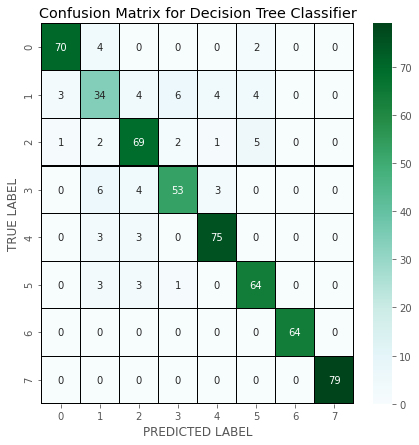

In [189]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [190]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9143356643356644
[[73  3  0  0  0  0  0  0]
 [ 2 38  3  4  5  3  0  0]
 [ 1  3 68  1  1  6  0  0]
 [ 0  4  6 54  2  0  0  0]
 [ 0  0  0  0 81  0  0  0]
 [ 0  2  2  1  0 66  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.76      0.69      0.72        55
           2       0.86      0.85      0.86        80
           3       0.90      0.82      0.86        66
           4       0.91      1.00      0.95        81
           5       0.88      0.93      0.90        71
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        79

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.91      0.91      0.91       572



The Random Forest Classifier has accuracy 91%.

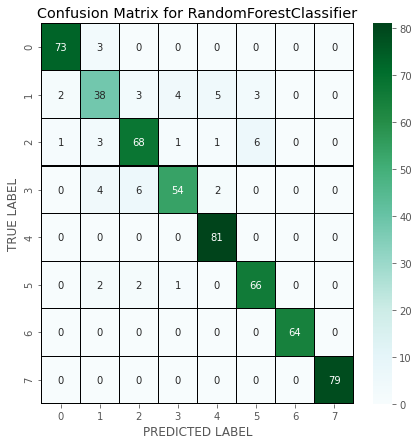

In [191]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support Vector Machine Classifier

In [192]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8111888111888111
[[65  0  0  0  0  1  0 10]
 [ 6 30  7  2  6  3  0  1]
 [ 2  3 46  5  5 18  0  1]
 [ 0  7  9 41  2  0  0  7]
 [ 0  0  0  0 81  0  0  0]
 [ 6  3  0  0  0 58  0  4]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        76
           1       0.70      0.55      0.61        55
           2       0.74      0.57      0.65        80
           3       0.85      0.62      0.72        66
           4       0.86      1.00      0.93        81
           5       0.72      0.82      0.77        71
           6       1.00      1.00      1.00        64
           7       0.77      1.00      0.87        79

    accuracy                           0.81       572
   macro avg       0.81      0.80      0.80       572
weighted avg       0.81      0.81      0.80       572



The accuracy using Support Vector Machine Classifier is 81%.

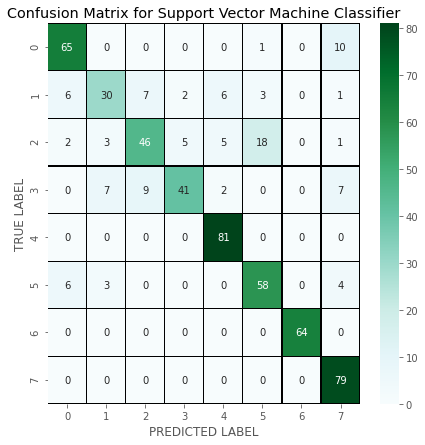

In [193]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# KNeighbors Classifier

In [194]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8811188811188811
[[74  1  0  0  0  1  0  0]
 [ 4 28  6  6  4  6  0  1]
 [ 1  2 65  1  1 10  0  0]
 [ 0  6  8 48  1  0  0  3]
 [ 0  0  0  0 81  0  0  0]
 [ 1  0  3  0  0 65  0  2]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        76
           1       0.76      0.51      0.61        55
           2       0.79      0.81      0.80        80
           3       0.87      0.73      0.79        66
           4       0.93      1.00      0.96        81
           5       0.79      0.92      0.85        71
           6       1.00      1.00      1.00        64
           7       0.93      1.00      0.96        79

    accuracy                           0.88       572
   macro avg       0.88      0.87      0.87       572
weighted avg       0.88      0.88      0.88       572



The accuracy using KNN is 88%

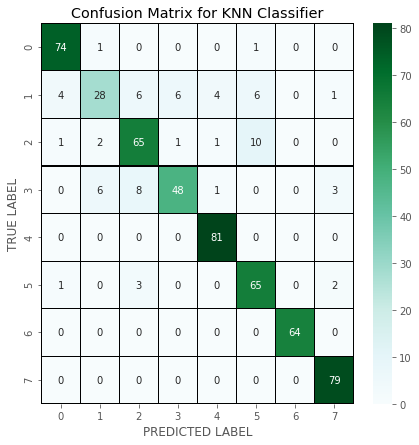

In [195]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [196]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8968531468531469
[[74  2  0  0  0  0  0  0]
 [ 3 41  5  0  5  1  0  0]
 [ 1  6 64  0  1  8  0  0]
 [ 0  4  8 51  3  0  0  0]
 [ 0  0  0  0 80  1  0  0]
 [ 1  5  4  1  0 60  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.71      0.75      0.73        55
           2       0.79      0.80      0.80        80
           3       0.98      0.77      0.86        66
           4       0.90      0.99      0.94        81
           5       0.86      0.85      0.85        71
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        79

    accuracy                           0.90       572
   macro avg       0.90      0.89      0.89       572
weighted avg       0.90      0.90      0.90       572



The accuracy using Gradient Boosting Classifier is 90%.

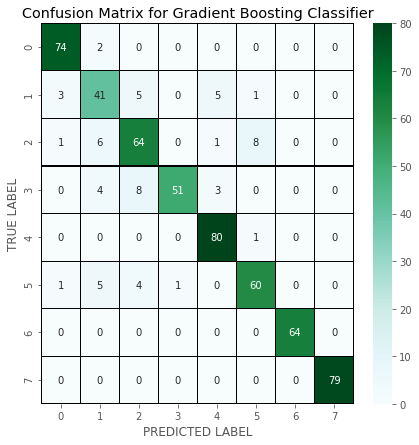

In [197]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Checking the Cross Validation Score

In [198]:
from sklearn.model_selection import cross_val_score

In [199]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8645144356955381


In [200]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9154482663351292


In [201]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.790964221577566


In [202]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8587304876364138


In [203]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.9028484597320071


By looking into the difference of Model accuracy and cross validation score GradientBoosting classifier is my best model.

# Hyperparameter Tuning

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [206]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [209]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [210]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [211]:
primary_fuel =GradientBoostingClassifier (criterion='mae', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_train, y_train)
pred = primary_fuel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.9090909090909


This is the final accuracy of the model after tuning.

# ROC AUC Curve:

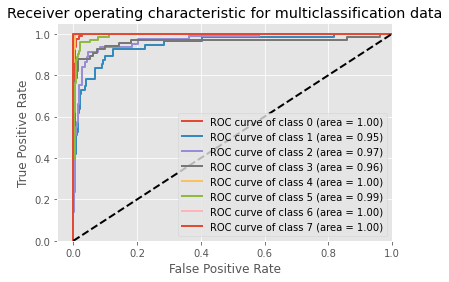

In [212]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

Above is the roc curves of all models

# Saving the model:

In [214]:
#Saving the model as .pkl file
import joblib
joblib.dump(primary_fuel,"power_plant_primary_fuel.pkl")

['power_plant_primary_fuel.pkl']

# 2. Prediction for capacity_mw

## Separating the features and label variables into x and y

In [215]:
x1 = new_df.drop("capacity_mw", axis=1)
y1 = new_df["capacity_mw"]

In [216]:
# Dimension of x
x1.shape

(851, 10)

In [217]:
# Dimension of y
y1.shape

(851,)

# Checking for skewness

In [218]:
# Checking the skewness
x1.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

Columns source and geolocation_source are categorical so no need to remove skewness in these columns. Except these two and primary_fuel all the columns having skewness.

# Removing skewness using yeo-johnson method

In [219]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew1 = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [220]:
x1[skew1] = scaler.fit_transform(x1[skew1].values)
x1[skew1].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [222]:
# Checking skewness after using yeo-johnson ethod
x1.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

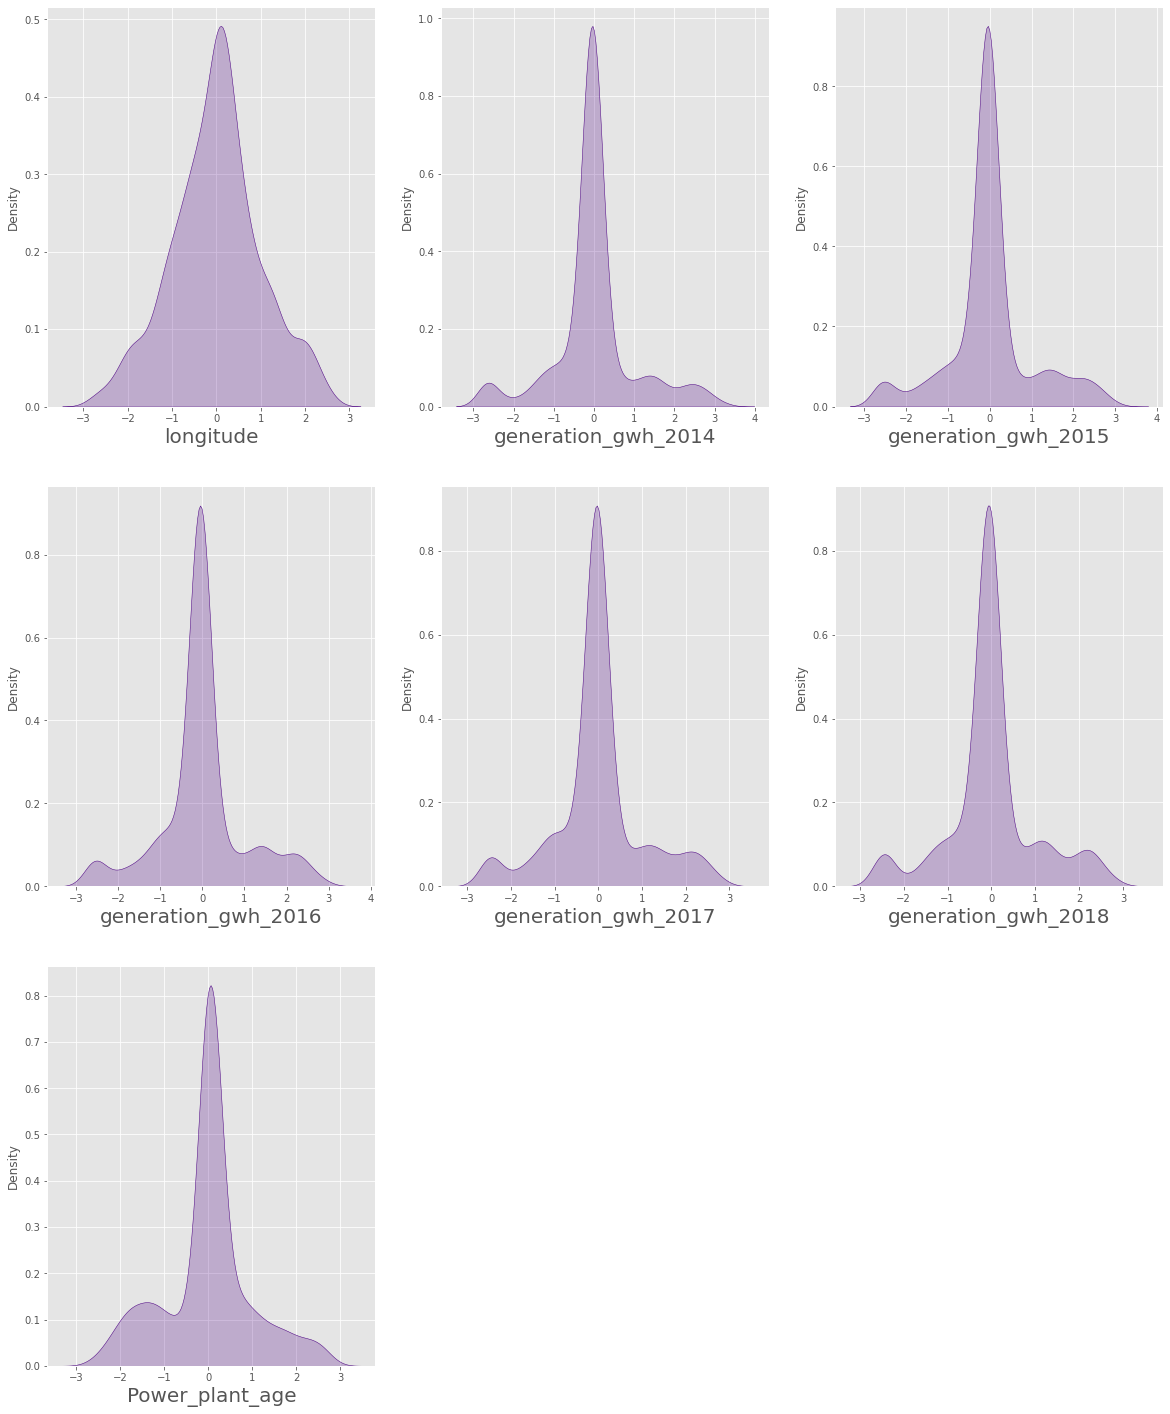

In [223]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x1[skew1]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x1[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Feature Scaling using Standard Scalarization

In [224]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

# Checking VIF values

In [225]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns

# Let's check the values
vif

,VIF values,Features
0,1.310001,longitude
1,1.682873,primary_fuel
2,1.503736,source
3,1.875773,geolocation_source
4,3.604587,generation_gwh_2014
5,6.181987,generation_gwh_2015
6,9.956820,generation_gwh_2016
7,9.749451,generation_gwh_2017
8,8.951311,generation_gwh_2018
9,1.103741,Power_plant_age


The VIF value is less than 10 in all the columns which means we are free from multicollinearity problem.

In [229]:
# DataFrame after preprocessing and data cleaning
x1.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


# Finding best random state

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [258]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x1_train, y1_train)
    pred = mod.predict(x1_test)
    acc=r2_score(y1_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8670734275931341  on Random_state  185


## Creating new train test split

In [259]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [260]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Random Forest Regressor

In [261]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x1_train,y1_train)

# prediction
predRFR=RFR.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y1_test, predRFR))
print('MSE:',metrics.mean_squared_error(y1_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predRFR)))

R2_Score: 0.8621989548038893
MAE: 84.00723460240222
MSE: 26034.085767563665
RMSE: 161.35081582552866


# Decision Tree Regressor

In [262]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x1_train,y1_train)

# prediction
predDTR=DTR.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y1_test, predDTR))
print('MSE:',metrics.mean_squared_error(y1_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predDTR)))

R2_Score: 0.6737521363491288
MAE: 116.53134960937498
MSE: 61636.43281285449
RMSE: 248.2668580637667


# KNeighbors Regressor

In [263]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x1_train,y1_train)

# prediction
predknn=knn.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predknn))
print('MAE:',metrics.mean_absolute_error(y1_test, predknn))
print('MSE:',metrics.mean_squared_error(y1_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predknn)))

R2_Score: 0.7891457926710945
MAE: 103.71002343750001
MSE: 39835.66677770969
RMSE: 199.58874411576843


# GradientBoosting Regressor

In [264]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x1_train,y1_train)

# prediction
predGB=GB.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predGB))
print('MAE:',metrics.mean_absolute_error(y1_test, predGB))
print('MSE:',metrics.mean_squared_error(y1_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predGB)))

R2_Score: 0.8475858361992298
MAE: 90.6780911427032
MSE: 28794.87167121097
RMSE: 169.69051732849118


# BaggingRegressor

In [265]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x1_train,y1_train)

# prediction
predBR=BR.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predBR))
print('MAE:',metrics.mean_absolute_error(y1_test, predBR))
print('MSE:',metrics.mean_squared_error(y1_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predBR)))

R2_Score: 0.849240742014113
MAE: 87.97609118641775
MSE: 28482.218310268785
RMSE: 168.76675712434835


# Checking the cross validation score

In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x1,y1,cv=5).mean())

0.7837848288513396


In [268]:
# Checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x1,y1,cv=5).mean())

0.5843634524338502


In [269]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.7243940528473077


In [270]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x1,y1,cv=5).mean())

0.750293240393743


In [271]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x1,y1,cv=5).mean())

0.752771124083801


From the above observation, the difference between R2 score and the cross validation score we conclude that KNeighbors is our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

# Hyper parameter tuning

In [272]:
from sklearn.model_selection import GridSearchCV

In [273]:
#KNeighborsRegressor
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}

In [276]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [277]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [278]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}

In [281]:
capacity = KNN(algorithm='auto', leaf_size=30, n_neighbors=5, weights='distance')
capacity.fit(x1_train, y1_train)
pred = capacity.predict(x1_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y1_test, predRFR)))
print('R2_Score:',r2_score(y1_test,pred)*100)

RMSE value: 161.35081582552866
R2_Score: 79.53887997317987


After tuning the model we got r2_score=79.53%.

# Saving the model

In [282]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']